In [859]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
import xgboost as xgb
import warnings

In [860]:
warnings.filterwarnings("ignore")

In [861]:
colums_name=["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]

In [862]:
data=pd.read_csv("auto-mpg.data",names=colums_name,na_values="?",comment="\t",sep=" ",skipinitialspace=True)

In [863]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [864]:
data=data.rename(columns={"MPG":"target"})

In [865]:
data.head()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [866]:
print("Data shape:", data.shape)

Data shape: (398, 8)


In [867]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [868]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


## Missing Value

In [869]:
data.isna().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [870]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())
data.isna().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [871]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

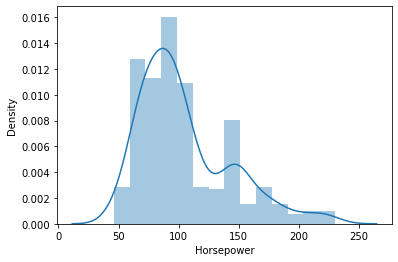

In [872]:
sns.distplot(data.Horsepower)

## Exploratoy Data Analysis

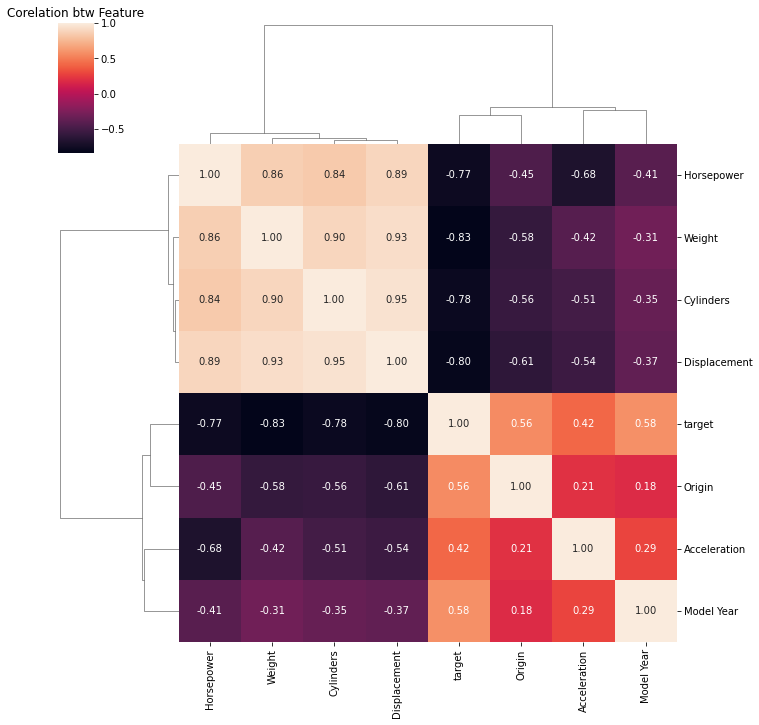

In [873]:
corr_matrix=data.corr()

sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Corelation btw Feature")
plt.show()

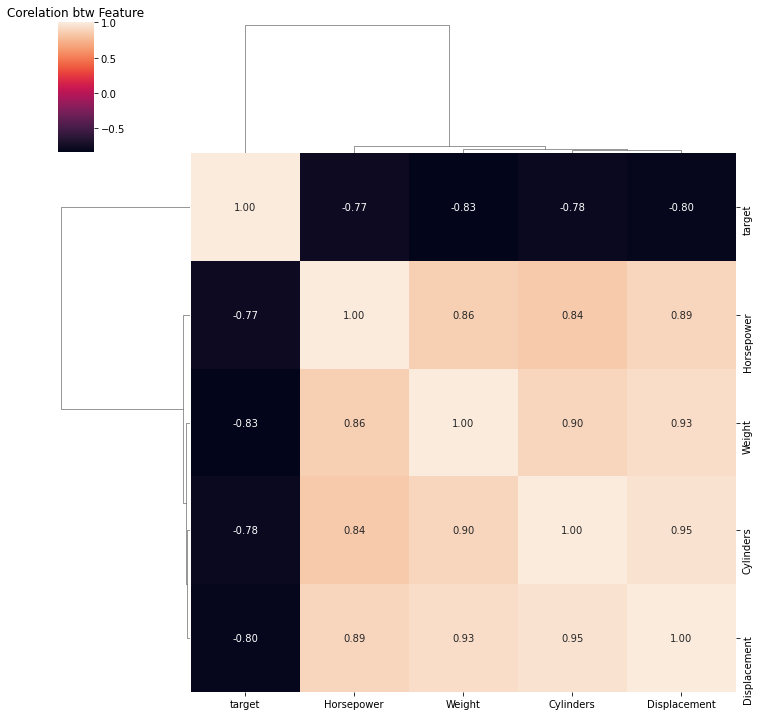

In [874]:
threshold=0.75
filtree=np.abs(corr_matrix["target"])>threshold
corr_features=corr_matrix.columns[filtree].tolist()

sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Corelation btw Feature")
plt.show()

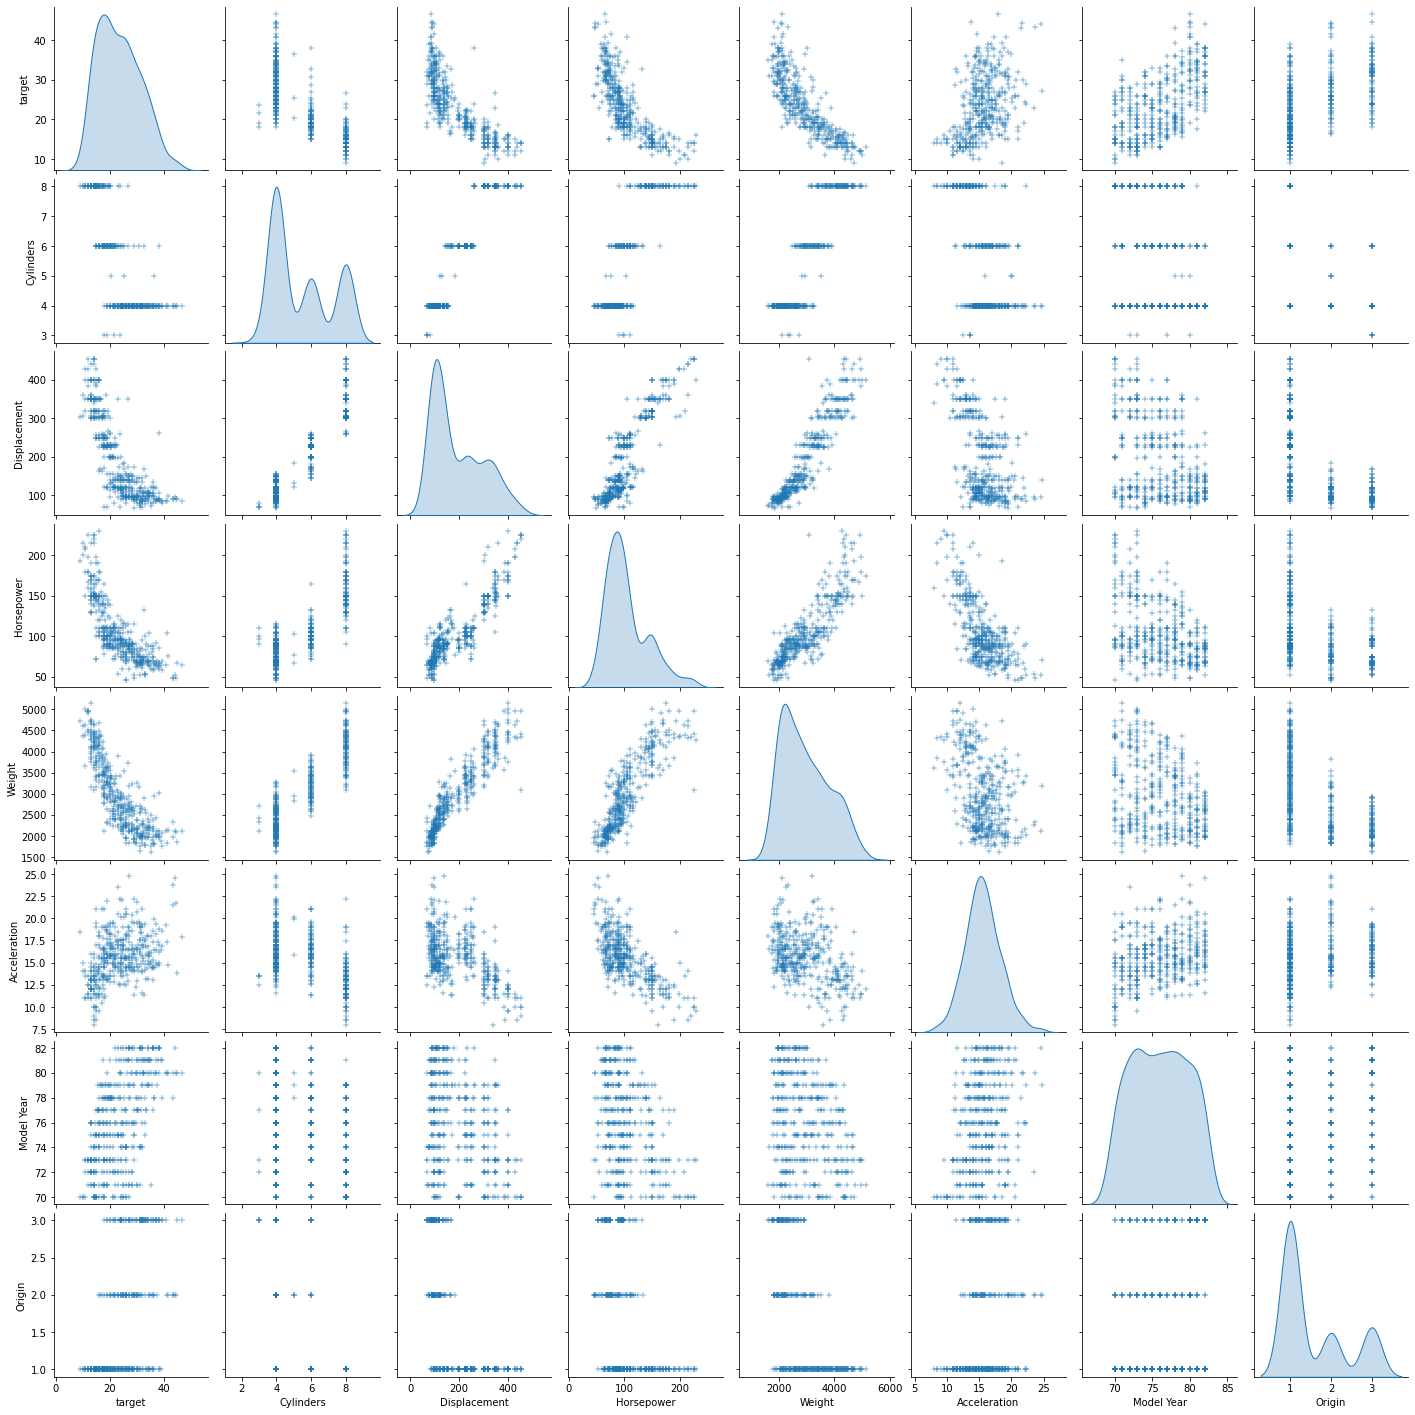

In [875]:
sns.pairplot(data,diag_kind="kde",markers="+")
plt.show()

cylinders and origin can be categorical

<AxesSubplot:xlabel='Origin', ylabel='count'>

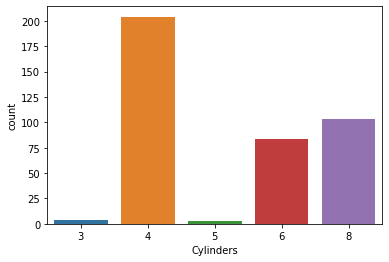

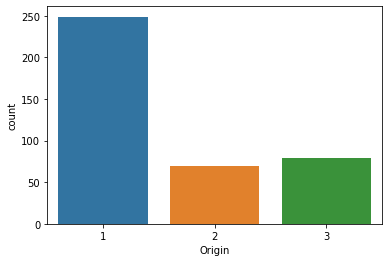

In [876]:
plt.figure()
sns.countplot(data["Cylinders"])

plt.figure()
sns.countplot(data["Origin"])

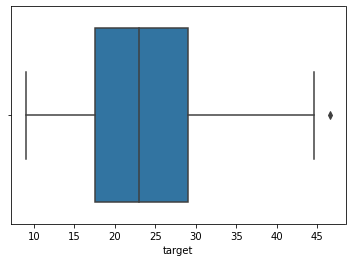

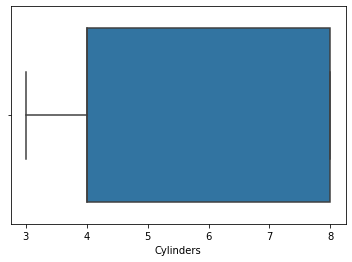

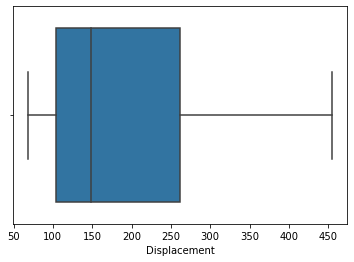

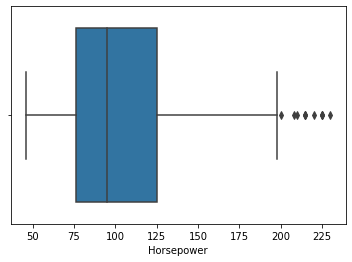

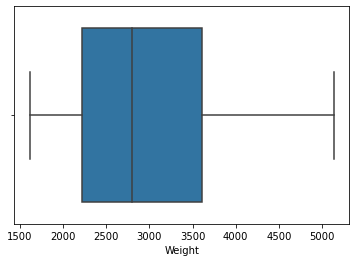

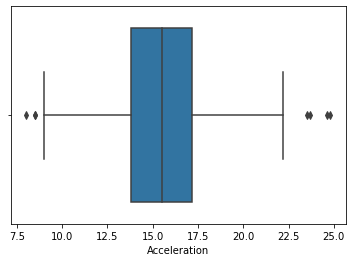

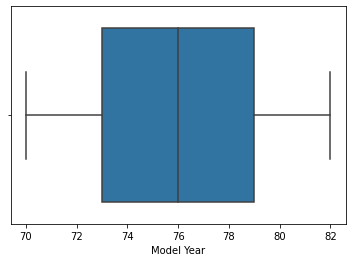

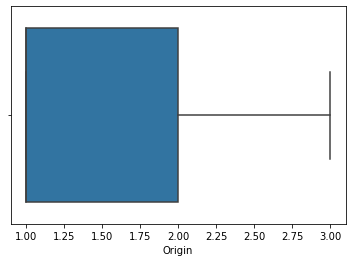

In [877]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x=c,data=data,orient="v")

outlier: Horsepower and acceleration

## Drop Outliers

In [878]:
print(data.shape)

(398, 8)


In [879]:
data["Horsepower"].describe()

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: Horsepower, dtype: float64

In [880]:
 data["Acceleration"].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

In [881]:
thr = 2
horsepower_desc = data["Horsepower"].describe()
q3_hp = data["Horsepower"].quantile(0.75)
q1_hp = data["Horsepower"].quantile(0.25)
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + (thr*IQR_hp)
bottom_limit_hp = q1_hp - (thr*IQR_hp)
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top
data = data[filter_hp]

In [882]:
acceleration_desc = data["Acceleration"].describe()
q3_acc = data["Acceleration"].quantile(0.75)
q1_acc = data["Acceleration"].quantile(0.25)
IQR_acc = q3_acc - q1_acc # q3 - q1
top_limit_acc = q3_acc + (thr*IQR_acc)
bottom_limit_acc = q1_acc - (thr*IQR_acc)
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]
filter_acc_top= data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

data = data[filter_acc]

In [883]:
print(data.shape)

(391, 8)


In [884]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,391.0,23.499233,7.688438,9.0,17.50,23.0,29.00,46.6
Cylinders,391.0,5.439898,1.691864,3.0,4.00,4.0,8.00,8.0
Displacement,391.0,191.535806,101.831774,68.0,104.50,146.0,260.00,454.0
Horsepower,391.0,103.587766,36.253625,46.0,76.00,95.0,121.00,220.0
Weight,391.0,2961.212276,840.866341,1613.0,2221.50,2795.0,3589.50,5140.0
Acceleration,391.0,15.556266,2.614772,8.0,13.95,15.5,17.05,23.5
Model Year,391.0,76.023018,3.678347,70.0,73.00,76.0,79.00,82.0
Origin,391.0,1.575448,0.806264,1.0,1.00,1.0,2.00,3.0


## Feature Engineering

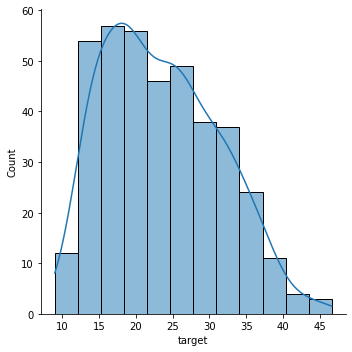

In [885]:
# Skewness
#Dependent
sns.displot(data.target,kde=True)
plt.show()

In [886]:
(mu,sigma)=norm.fit(data["target"])
print("mu:{}, sigma:{} ".format(mu,sigma))

mu:23.499232736572893, sigma:7.678599778082707 


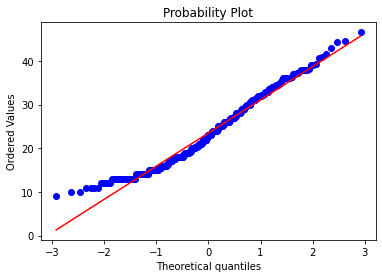

In [887]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

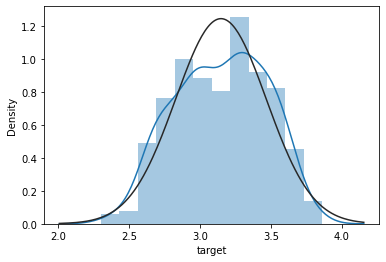

In [888]:
data["target"]=np.log1p(data["target"])
plt.figure()
sns.distplot(data.target, fit = norm)
plt.show()

In [889]:
(mu,sigma)=norm.fit(data["target"])
print("mu:{}, sigma:{} ".format(mu,sigma))

mu:3.148549778053243, sigma:0.31986792768696354 


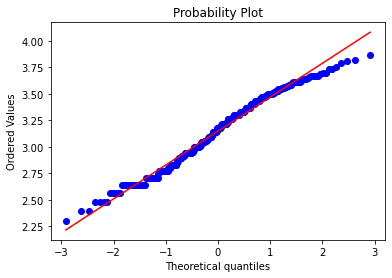

In [890]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

In [891]:
# Skewness
#independent 

skewness_feature=data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame(skewness_feature,columns=["Skewed"])
skewness

,Skewed
Horsepower,1.002620
Origin,0.915147
Displacement,0.692506
Cylinders,0.539419
Weight,0.530167
Acceleration,0.144566
Model Year,0.010762
target,-0.134213


In [892]:
# One Hot Encoding
data["Cylinders"]=data["Cylinders"].astype(str) #convert to categorical
data["Origin"]=data["Origin"].astype(str)#convert to categorical
data= pd.get_dummies(data) #applies one hot encoding to all categorical variables in the data


In [893]:
print(data.shape)

(391, 14)


## Split Standardization

In [894]:
x=data.drop(["target"],axis=1)
y=data.target

In [895]:
y

0      2.944439
1      2.772589
2      2.944439
3      2.833213
4      2.890372
         ...   
392    3.332205
393    3.332205
395    3.496508
396    3.367296
397    3.465736
Name: target, Length: 391, dtype: float64

In [896]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.9,random_state=42)

In [897]:
# Standardization    
#sclaer=StandardScaler()    # may use RobusLScaler
sclaer=RobustScaler()
X_train=sclaer.fit_transform(X_train)
X_test=sclaer.transform(X_test)

## Regression Models

In [898]:
# Linear regression

lr=LinearRegression()
lr.fit(X_train,y_train)
print("LR Coef",lr.coef_)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Linear regression MSE:",mse)

LR Coef [-2.02630240e-01 -5.63422545e-02 -9.11956073e-02 -5.87727398e-02
  1.68590365e-01  6.93889390e-18  2.81598102e-02 -9.42041946e-02
  2.29362836e-02  4.31081008e-02 -9.64735408e-03  3.58575237e-02
 -8.28140775e-03]
Linear regression MSE: 0.01766970565838264


Ridge regression coef: [-0.14062944 -0.06101243 -0.10725401 -0.05906866  0.16280359  0.
  0.05424678 -0.06179908  0.0087537  -0.0012014  -0.01185961  0.0347896
 -0.00553519]
Ridge best Estimator Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE  0.01623448387522407


Text(0.5, 1.0, 'Ridge')

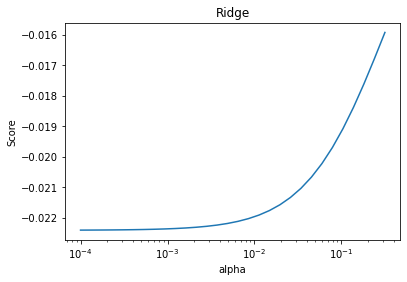

In [899]:
# Ridge regression(L2)

ridge=Ridge(random_state=42,max_iter=10000)
alphas=np.logspace(-4,-0.5,30)
tunned_prm=[{"alpha":alphas}]
n_folds=5
clf=GridSearchCV(ridge,tunned_prm,cv=n_folds,scoring="neg_mean_squared_error", refit=True)
clf.fit(X_train,y_train)
scrores=clf.cv_results_["mean_test_score"]
print("Ridge regression coef:",clf.best_estimator_.coef_)
ridge=clf.best_estimator_
print("Ridge best Estimator",ridge)
y_pred=clf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Ridge MSE ",mse)
plt.figure()
plt.semilogx(alphas,scrores)
plt.xlabel("alpha")
plt.ylabel("Score")
plt.title("Ridge")

lasso regression coef: [-0.17118857 -0.0284823  -0.13603776 -0.04214211  0.13982705  0.
  0.00808585 -0.         -0.         -0.         -0.          0.01559036
  0.        ]
lasso best Estimator Lasso(alpha=0.006461670787466976, max_iter=10000, random_state=42)
lasso MSE  0.015914761581440572


Text(0.5, 1.0, 'lasso')

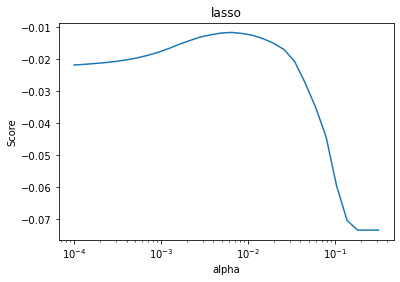

In [900]:
#Lasso regression(L1)

lasso=Lasso(random_state=42,max_iter=10000)
alphas=np.logspace(-4,-0.5,30)
tunned_prm=[{"alpha":alphas}]
n_folds=5
clf=GridSearchCV(lasso,tunned_prm,cv=n_folds,scoring="neg_mean_squared_error", refit=True)
clf.fit(X_train,y_train)
scrores=clf.cv_results_["mean_test_score"]
print("lasso regression coef:",clf.best_estimator_.coef_)
lasso=clf.best_estimator_
print("lasso best Estimator",lasso)
y_pred=clf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("lasso MSE ",mse)
plt.figure()
plt.semilogx(alphas,scrores)
plt.xlabel("alpha")
plt.ylabel("Score")
plt.title("lasso")

In [901]:
#ElasticNet (uses the term both lasso and Ridge)

parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}
eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, y_train)
print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("ElasticNet MSE: ",mse)

ElasticNet Coef:  [-0.12940213 -0.05106386 -0.1227254  -0.04713633  0.13653461  0.
  0.04482574 -0.         -0.         -0.         -0.          0.02261428
  0.        ]
ElasticNet Best Estimator:  ElasticNet(alpha=0.02592943797404667, l1_ratio=0.2, max_iter=10000,
           random_state=42)
ElasticNet MSE:  0.014972548684105908


In [ ]:
#XGBoost

